In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# We got some null values in the dataset
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

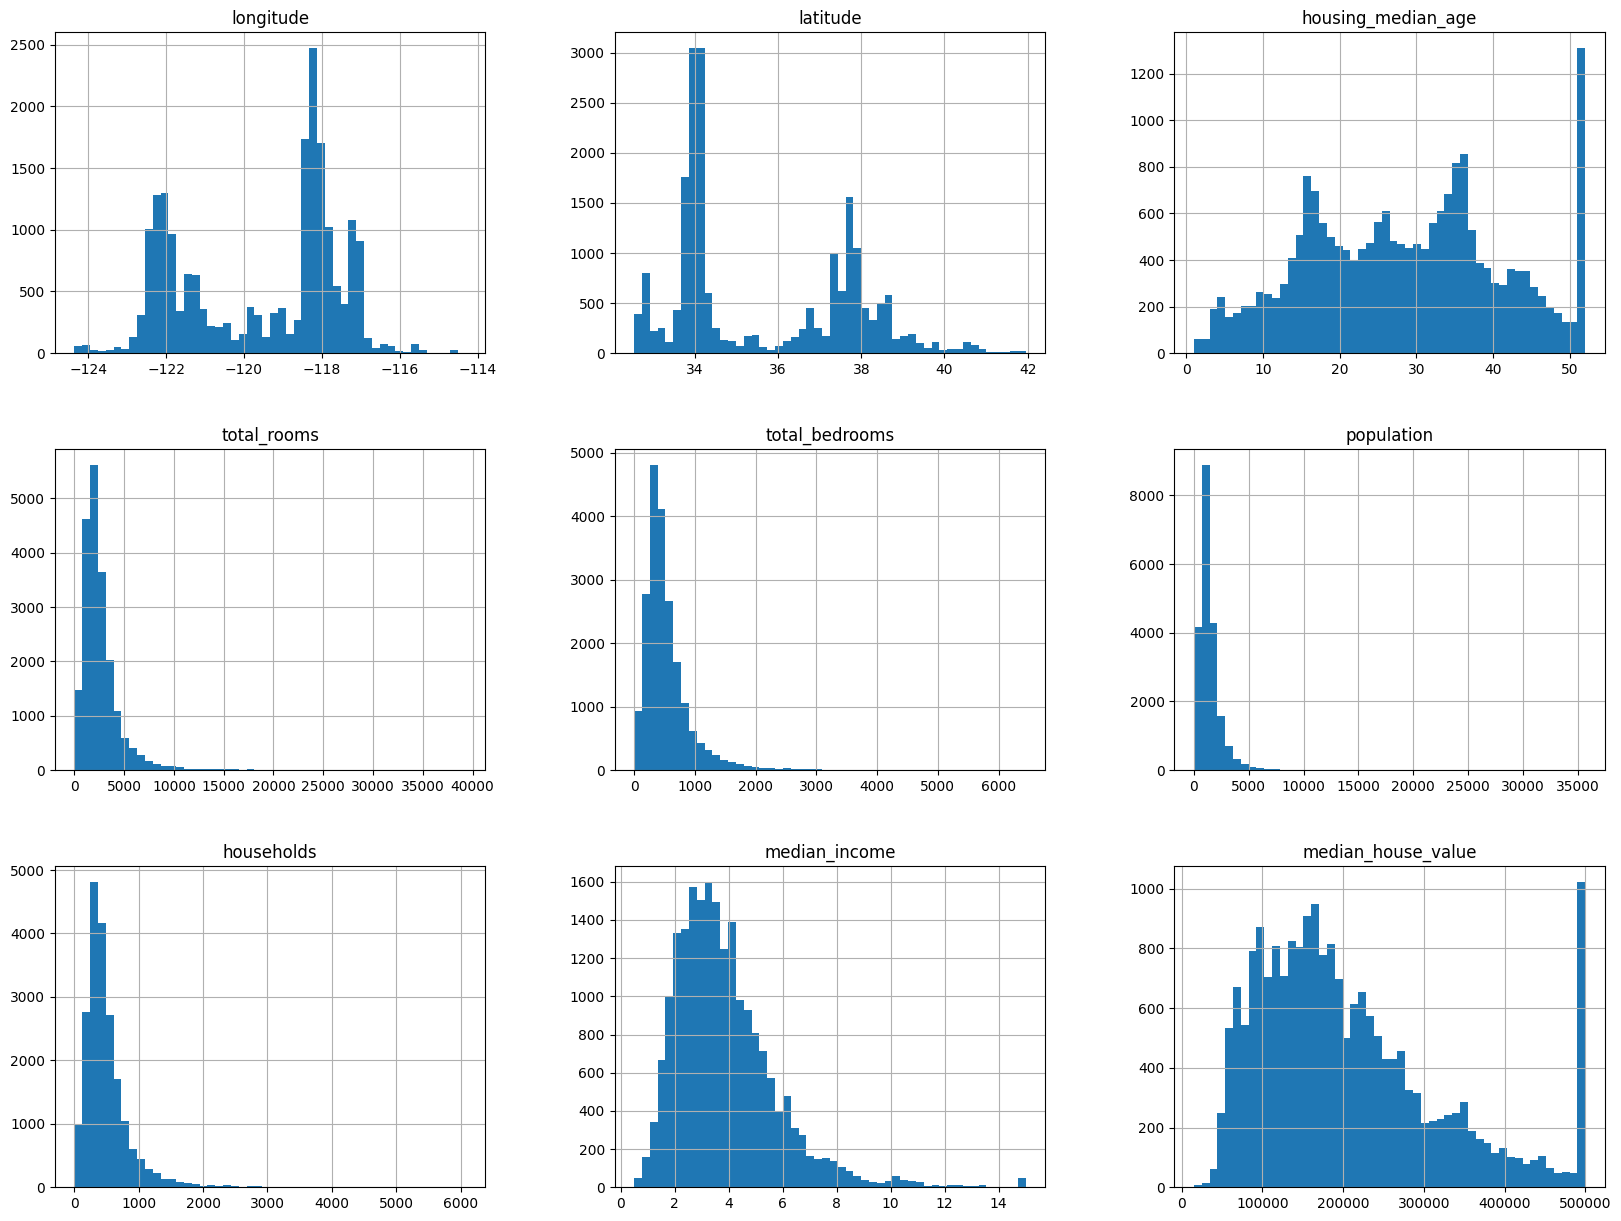

In [7]:
df.hist(bins=50, figsize=(20,15))

In [42]:
# Because Our dataset is kind of skwed we need to do some feature scaling
df["total_rooms"] = np.log(df["total_rooms"])
df["total_bedrooms"] = np.log(df["total_bedrooms"])
df["population"] = np.log(df["population"])
df["households"] = np.log(df["households"])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

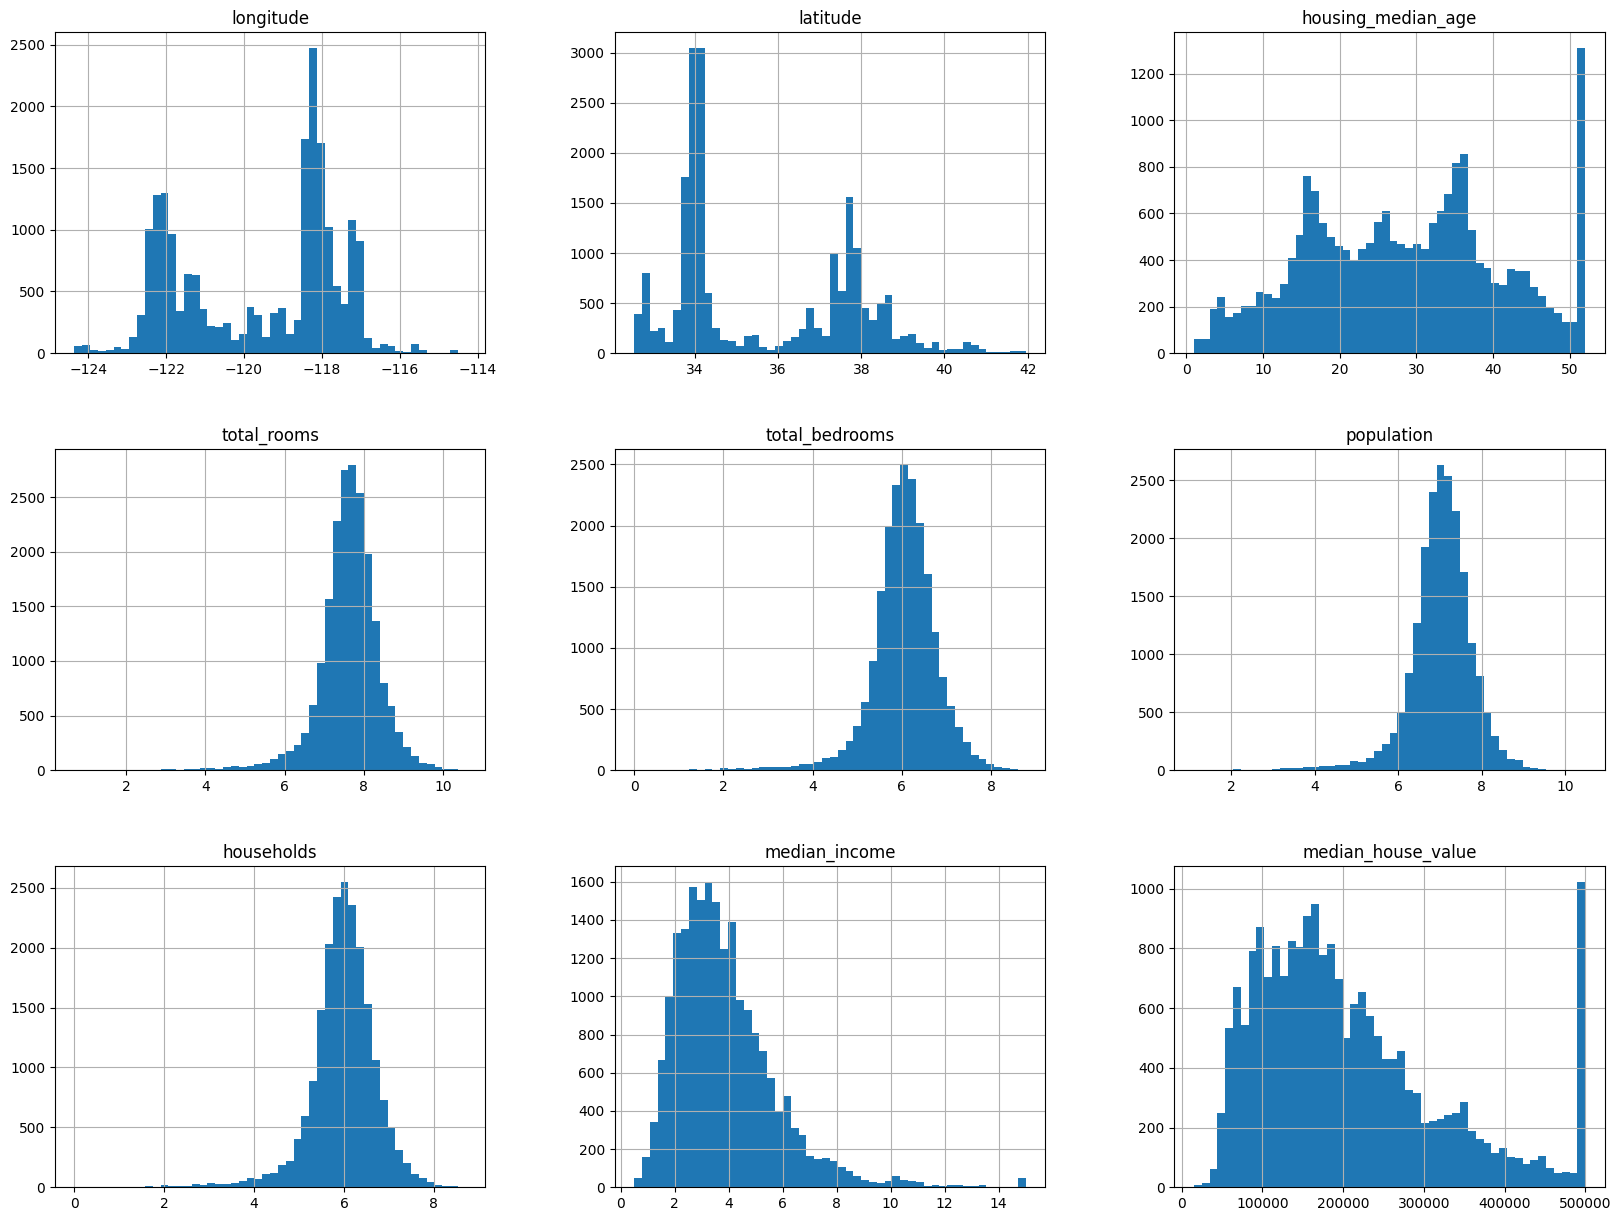

In [43]:
df.hist(bins=50, figsize=(20,15))

In [44]:
# Let's check the correlation between the features
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_16704\4289588461.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.029888,0.060486,0.109012,0.055532,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.032500,-0.067948,-0.136321,-0.087902,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.313424,-0.270615,-0.242415,-0.240147,-0.118278,0.106432
total_rooms,0.029888,-0.032500,-0.313424,1.000000,0.946108,0.864695,0.931841,0.205530,0.158311
total_bedrooms,0.060486,-0.067948,-0.270615,0.946108,1.000000,0.897548,0.974466,-0.025748,0.052926
population,0.109012,-0.136321,-0.242415,0.864695,0.897548,1.000000,0.932223,-0.004767,-0.021856
households,0.055532,-0.087902,-0.240147,0.931841,0.974466,0.932223,1.000000,0.003663,0.072329
median_income,-0.015550,-0.079626,-0.118278,0.205530,-0.025748,-0.004767,0.003663,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.158311,0.052926,-0.021856,0.072329,0.688355,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_16704\2967624008.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<Axes: >

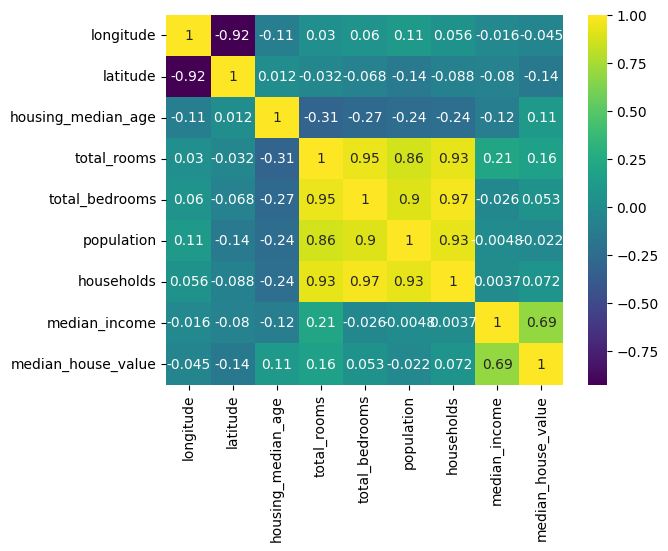

In [45]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [47]:
# feature engineering
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [48]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1).drop('ocean_proximity', axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.417580,5.924256,6.739337,5.799093,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.546785,5.010635,5.874931,4.736198,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720462,6.184149,6.914731,6.070738,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528332,6.013715,6.608001,5.855072,1.8672,84700.0,0,1,0,0,0


<Axes: >

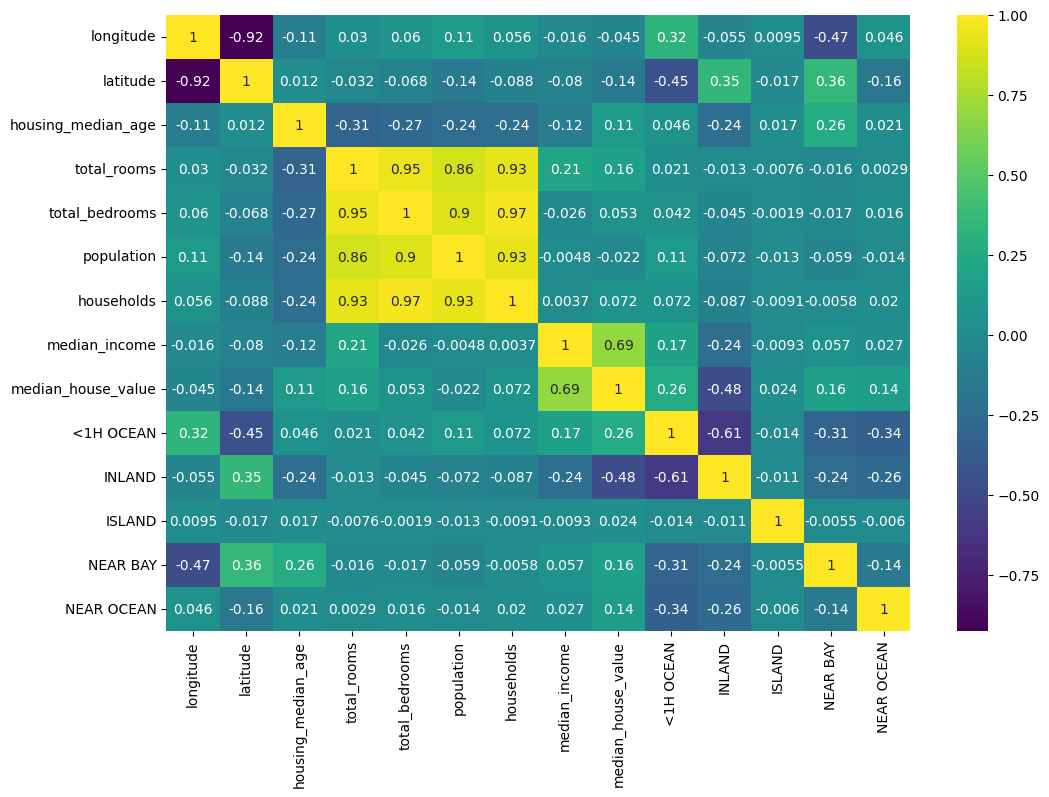

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Axes: xlabel='latitude', ylabel='longitude'>

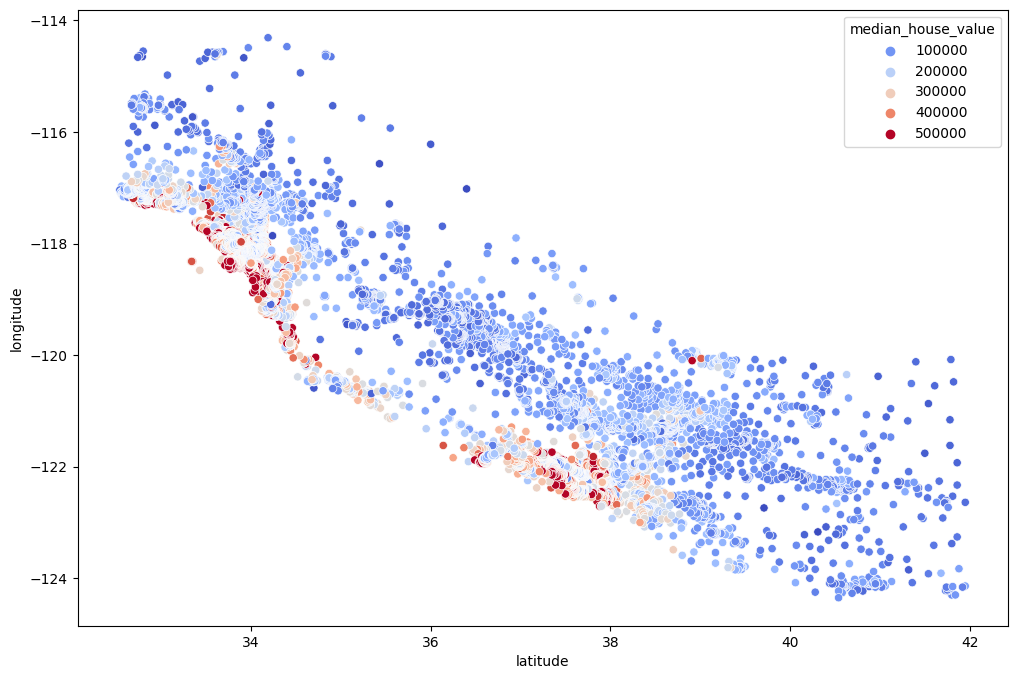

In [50]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='median_house_value', palette='coolwarm')

# Interpretation of scatterplot of latitude and longtitude
As we can see the houses close to the ocean/coast line are more expensive and the ones close to inland are relatively cheap

In [51]:
# How many bedrooms per room
df["bedroom_ratio"] = df["total_bedrooms"]/df["total_rooms"]
# The room number doesn't gives us accurate information but the ratio of it to households does
df["rooms_per_household"] = df["total_rooms"]/df["households"]


<Axes: >

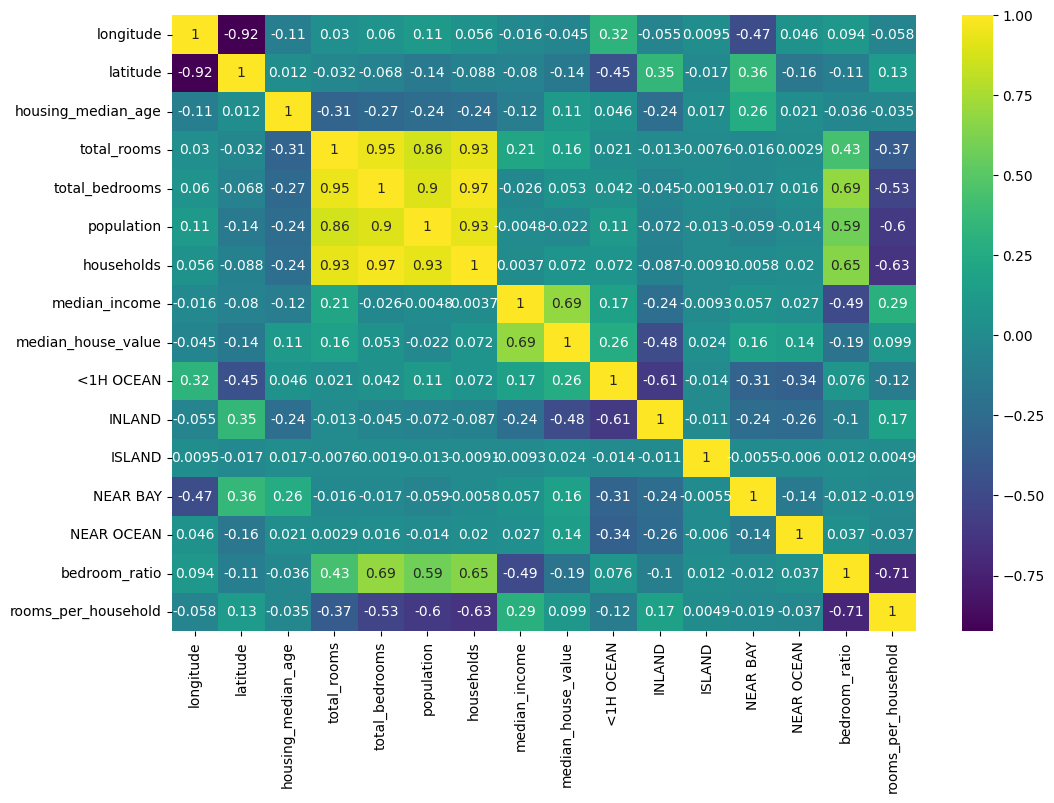

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [79]:
# Building the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


X_train = X_train[np.isfinite(X_train).all(1)]
y_train.drop([14303], inplace=True)

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [80]:
X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)


In [81]:
reg.score(X_test, y_test)

0.668222995455461

In [60]:
np.all(np.isfinite(X_train))

False